<a href="https://colab.research.google.com/github/debadattasarangi/ML/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib as mtp
import seaborn as sns

In [41]:
aerofit=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

# 1-->Defining Problem Statement and Analysing basic metrics
# 2-->Non-Graphical Analysis: Value counts and unique attributes

In [119]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age3,Experience
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Fresher
1,KP281,19,Male,15,Single,2,3,31836,75,Young,SE1
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,SE1
3,KP281,19,Male,12,Single,3,3,32973,85,Young,SE1
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,SE1


In [120]:
aerofit.shape
#size of dataset ->180 rows , 9 columns

(180, 11)

In [121]:
aerofit.info()
# there is no column with null values
# product , gender and maritialstatus columns contains string data , other columns contains int data
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
 9   Age3           180 non-null    object
 10  Experience     180 non-null    object
dtypes: int64(6), object(5)
memory usage: 15.6+ KB


In [122]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [123]:
aerofit.nunique()
# aerofit provides 3 types of product to the different aged customers 

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
Age3              3
Experience        5
dtype: int64

In [124]:
aerofit.groupby(["Product"]).count()
# Most used trademill was KP281(entry-level treadmill that sells for $1,500.) 

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age3,Experience
Product,,,,,,,,,,
KP281,80,80,80,80,80,80,80,80,80,80
KP481,60,60,60,60,60,60,60,60,60,60
KP781,40,40,40,40,40,40,40,40,40,40


In [125]:
aerofit["Age"].describe()
# minimum customer age was 18 and maximum customer age was 50

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [126]:
aerofit.groupby(["Age","Product"]).count().head(50)
# if you see the below table you can find that different trade mill products used by different types of aged people .The customers age between 18 th to 21 they used KP281 and KP481 products.
# So here its bit difficult to find the relationship between the product and the age

Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles  \
Age Product                                                                    
18  KP281         1          1              1      1        1       1      1   
19  KP281         3          3              3      3        3       3      3   
    KP481         1          1              1      1        1       1      1   
20  KP281         2          2              2      2        2       2      2   
    KP481         3          3              3      3        3       3      3   
21  KP281         4          4              4      4        4       4      4   
    KP481         3          3              3      3        3       3      3   
22  KP281         4          4              4      4        4       4      4   
    KP781         3          3              3      3        3       3      3   
23  KP281         8          8              8      8        8       8      8   
    KP481         7          7              7      7        7       7      7   
    KP781         3          3              3      3        3       3      3   
24  KP281         5          5              5      5        5       5      5   
    KP481         3          3              3      3        3       3      3   
    KP781         4          4              4      4        4       4      4   
25  KP281         7          7              7      7        7       7      7   
    KP481        11         11             11     11       11      11     11   
    KP781         7          7              7      7        7       7      7   
26  KP281         7          7              7      7        7       7      7   
    KP481         3          3              3      3        3       3      3   
    KP781         2          2              2      2        2       2      2   
27  KP281         3          3              3      3        3       3      3   
    KP481         1          1              1      1        1       1      1   
    KP781         3          3              3      3        3       3      3   
28  KP281         6          6              6      6        6       6      6   
    KP781         3          3              3      3        3       3      3   
29  KP281         3          3              3      3        3       3      3   
    KP481         1          1              1      1        1       1      1   
    KP781         2          2              2      2        2       2      2   
30  KP281         2          2              2      2        2       2      2   
    KP481         2          2              2      2        2       2      2   
    KP781         3          3              3      3        3       3      3   
31  KP281         2          2              2      2        2       2      2   
    KP481         3          3              3      3        3       3      3   
    KP781         1          1              1      1        1       1      1   
32  KP281         2          2              2      2        2       2      2   
    KP481         2          2              2      2        2       2      2   
33  KP281         2          2              2      2        2       2      2   
    KP481         5          5              5      5        5       5      5   
    KP781         1          1              1      1        1       1      1   
34  KP281         2          2              2      2        2       2      2   
    KP481         3          3              3      3        3       3      3   
    KP781         1          1              1      1        1       1      1   
35  KP281         3          3              3      3        3       3      3   
    KP481         4          4              4      4        4       4      4   
    KP781         1          1              1      1        1       1      1   
36  KP281         1          1              1      1        1       1      1   
37  KP281         1          1              1      1        1       1      1   
    KP481    

In [127]:
aerofit.groupby(["Age","Product"]).count().tail(50)

Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles  \
Age Product                                                                    
26  KP281         7          7              7      7        7       7      7   
    KP481         3          3              3      3        3       3      3   
    KP781         2          2              2      2        2       2      2   
27  KP281         3          3              3      3        3       3      3   
    KP481         1          1              1      1        1       1      1   
    KP781         3          3              3      3        3       3      3   
28  KP281         6          6              6      6        6       6      6   
    KP781         3          3              3      3        3       3      3   
29  KP281         3          3              3      3        3       3      3   
    KP481         1          1              1      1        1       1      1   
    KP781         2          2              2      2        2       2      2   
30  KP281         2          2              2      2        2       2      2   
    KP481         2          2              2      2        2       2      2   
    KP781         3          3              3      3        3       3      3   
31  KP281         2          2              2      2        2       2      2   
    KP481         3          3              3      3        3       3      3   
    KP781         1          1              1      1        1       1      1   
32  KP281         2          2              2      2        2       2      2   
    KP481         2          2              2      2        2       2      2   
33  KP281         2          2              2      2        2       2      2   
    KP481         5          5              5      5        5       5      5   
    KP781         1          1              1      1        1       1      1   
34  KP281         2          2              2      2        2       2      2   
    KP481         3          3              3      3        3       3      3   
    KP781         1          1              1      1        1       1      1   
35  KP281         3          3              3      3        3       3      3   
    KP481         4          4              4      4        4       4      4   
    KP781         1          1              1      1        1       1      1   
36  KP281         1          1              1      1        1       1      1   
37  KP281         1          1              1      1        1       1      1   
    KP481         1          1              1      1        1       1      1   
38  KP281         4          4              4      4        4       4      4   
    KP481         2          2              2      2        2       2      2   
    KP781         1          1              1      1        1       1      1   
39  KP281         1          1              1      1        1       1      1   
40  KP281         1          1              1      1        1       1      1   
    KP481         3          3              3      3        3       3      3   
    KP781         1          1              1      1        1       1      1   
41  KP281         1          1              1      1        1       1      1   
42  KP781         1          1              1      1        1       1      1   
43  KP281         1          1              1      1        1       1      1   
44  KP281         1          1              1      1        1       1      1   
45  KP481         1          1              1      1        1       1      1   
    KP781         1          1              1      1        1       1      1   
46  KP281         1          1              1      1        1       1      1   
47  KP281         1          1              1      1        1       1      1   
    KP781         1          1              1      1        1       1      1   
48  KP481         1          1              1      1        1       1      1   
    KP781    

In [128]:
aerofit.groupby(["Gender","Product"]).count()
# from below table i found that KP781 was more used by males as compared to femal
# mostly equall number of males and females using KP481 and KP281 trademills.
# For KP281 and KP481 We can target both female and male customers 
# For KP781 we can target male customers 

Age  Education  MaritalStatus  Usage  Fitness  Income  Miles  \
Gender Product                                                                 
Female KP281     40         40             40     40       40      40     40   
       KP481     29         29             29     29       29      29     29   
       KP781      7          7              7      7        7       7      7   
Male   KP281     40         40             40     40       40      40     40   
       KP481     31         31             31     31       31      31     31   
       KP781     33         33             33     33       33      33     33   

                Age3  Experience  
Gender Product                    
Female KP281      40          40  
       KP481      29          29  
       KP781       7           7  
Male   KP281      40          40  
       KP481      31          31  
       KP781      33          33

In [129]:
aerofit.groupby(["Gender","MaritalStatus","Product"]).count()

Age  Education  Usage  Fitness  Income  Miles  \
Gender MaritalStatus Product                                                  
Female Partnered     KP281     27         27     27       27      27     27   
                     KP481     15         15     15       15      15     15   
                     KP781      4          4      4        4       4      4   
       Single        KP281     13         13     13       13      13     13   
                     KP481     14         14     14       14      14     14   
                     KP781      3          3      3        3       3      3   
Male   Partnered     KP281     21         21     21       21      21     21   
                     KP481     21         21     21       21      21     21   
                     KP781     19         19     19       19      19     19   
       Single        KP281     19         19     19       19      19     19   
                     KP481     10         10     10       10      10     10   
                     KP781     14         14     14       14      14     14   

                              Age3  Experience  
Gender MaritalStatus Product                    
Female Partnered     KP281      27          27  
                     KP481      15          15  
                     KP781       4           4  
       Single        KP281      13          13  
                     KP481      14          14  
                     KP781       3           3  
Male   Partnered     KP281      21          21  
                     KP481      21          21  
                     KP781      19          19  
       Single        KP281      19          19  
                     KP481      10          10  
                     KP781      14          14

In [130]:
aerofit.groupby(["MaritalStatus","Product"]).count()
# 60% of customers are married and 40% of customers are single .
# There is a high chance that if the customer was married then he can buy one of the tradermill.

Age  Gender  Education  Usage  Fitness  Income  Miles  \
MaritalStatus Product                                                          
Partnered     KP281     48      48         48     48       48      48     48   
              KP481     36      36         36     36       36      36     36   
              KP781     23      23         23     23       23      23     23   
Single        KP281     32      32         32     32       32      32     32   
              KP481     24      24         24     24       24      24     24   
              KP781     17      17         17     17       17      17     17   

                       Age3  Experience  
MaritalStatus Product                    
Partnered     KP281      48          48  
              KP481      36          36  
              KP781      23          23  
Single        KP281      32          32  
              KP481      24          24  
              KP781      17          17

In [131]:
aerofit.groupby(["Product","MaritalStatus","Income"]).count().head(180)
# We can recomend KP281 and KP481 trademill to the singles whose income ranges between 29562 to 50000 
# Singles whose income more than 50000 we can recomend them for KP481 and KP781
# Partners whose salary was greater than 50000 , we can recomemd them for KP781 trademill , whose salary less than 50000 will recomend them for KP481 and KP281 TRADEMILLS

Age  Gender  Education  Usage  Fitness  Miles  \
Product MaritalStatus Income                                                  
KP281   Partnered     30699     1       1          1      1        1      1   
                      32973     1       1          1      1        1      1   
                      34110     1       1          1      1        1      1   
                      35247     3       3          3      3        3      3   
                      37521     2       2          2      2        2      2   
...                           ...     ...        ...    ...      ...    ...   
KP781   Single        83416     1       1          1      1        1      1   
                      88396     2       2          2      2        2      2   
                      89641     1       1          1      1        1      1   
                      90886     1       1          1      1        1      1   
                      92131     1       1          1      1        1      1   

                              Age3  Experience  
Product MaritalStatus Income                    
KP281   Partnered     30699      1           1  
                      32973      1           1  
                      34110      1           1  
                      35247      3           3  
                      37521      2           2  
...                            ...         ...  
KP781   Single        83416      1           1  
                      88396      2           2  
                      89641      1           1  
                      90886      1           1  
                      92131      1           1  

[111 rows x 8 columns]

In [132]:
aerofit.groupby(["Product","MaritalStatus","Fitness","Income"]).count()
# We can recomend KP281 and KP481 trademill to the singles whose income ranges between 29562 to 50000 and the fitness level less than or equalls to 3
# Singles whose income more than 50000 we can recomend them for KP481 and KP781 and the fitness more than or equalls to 4

# Partners whose salary was greater than 50000 and fitness level >=4 , we can recomemd them for KP781 trademill whose , 
# Partners whose salary less than 50000 will recomend them for KP481 and KP281 TRADEMILLS

Age  Gender  Education  Usage  Miles  \
Product MaritalStatus Fitness Income                                         
KP281   Partnered     1       38658     1       1          1      1      1   
                      2       34110     1       1          1      1      1   
                              35247     2       2          2      2      2   
                              40932     1       1          1      1      1   
                              42069     1       1          1      1      1   
...                                   ...     ...        ...    ...    ...   
KP781   Single        5       61006     1       1          1      1      1   
                              83416     1       1          1      1      1   
                              88396     1       1          1      1      1   
                              90886     1       1          1      1      1   
                              92131     1       1          1      1      1   

                                      Age3  Experience  
Product MaritalStatus Fitness Income                    
KP281   Partnered     1       38658      1           1  
                      2       34110      1           1  
                              35247      2           2  
                              40932      1           1  
                              42069      1           1  
...                                    ...         ...  
KP781   Single        5       61006      1           1  
                              83416      1           1  
                              88396      1           1  
                              90886      1           1  
                              92131      1           1  

[140 rows x 7 columns]

***3-->Visual Analysis - Univariate & Bivariate ***





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


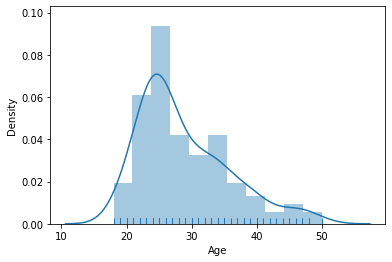

In [133]:
# ['Age','Education','Usage','Fitness','Income','Miles']:
sns.distplot( a=aerofit.Age,rug=True)
# Customers age started from 18- 50 , density of customers more between 21-35

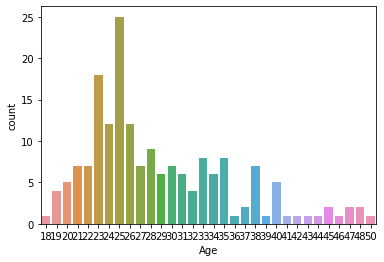

In [134]:
sns.countplot(x=aerofit.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


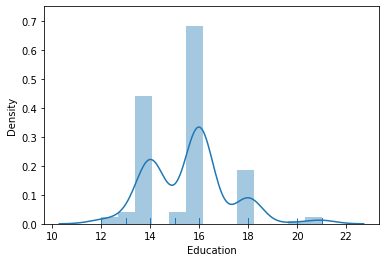

In [135]:
# ['Age','Education','Usage','Fitness','Income','Miles']:
sns.distplot( a=aerofit.Education,rug=True)
# most of the customers educations between 13-18

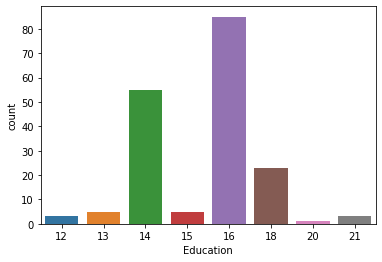

In [136]:
sns.countplot(x=aerofit.Education)
# most of the custermers belongs to 14 and 16 education level

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


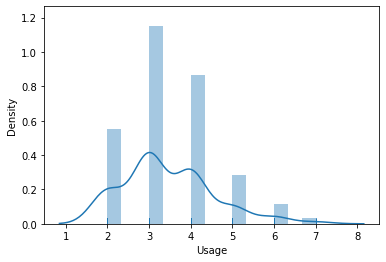

In [137]:
# ['Age','Education','Usage','Fitness','Income','Miles']:
sns.distplot( a=aerofit.Usage,rug=True)
# very few customers use trademills everyday, most of the customers usies trademill 3-4 dayes a week

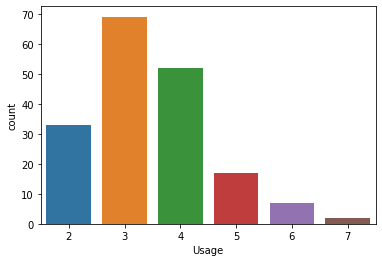

In [138]:
sns.countplot(x=aerofit.Usage)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


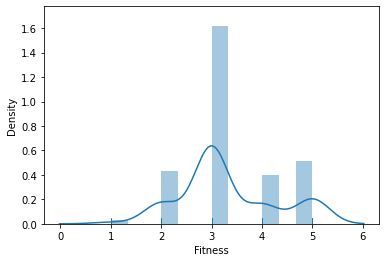

In [139]:
# ['Age','Education','Usage','Fitness','Income','Miles']:
sns.distplot( a=aerofit.Fitness,rug=True)
# most of the customers belongs to fitness level 3

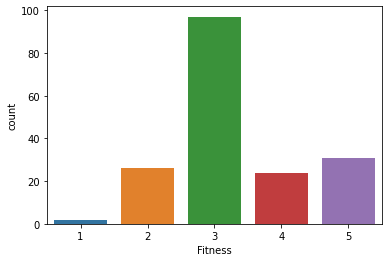

In [140]:
sns.countplot(x=aerofit.Fitness)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


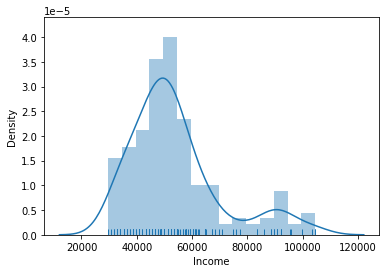

In [141]:
# ['Age','Education','Usage','Fitness','Income','Miles']:
sns.distplot( a=aerofit.Income,rug=True)
# very few peoples earning more than 70k ,most people earning 30k-60k

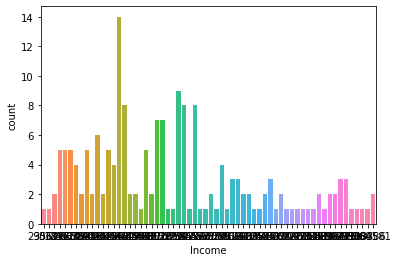

In [142]:
sns.countplot(x=aerofit.Income,saturation=4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


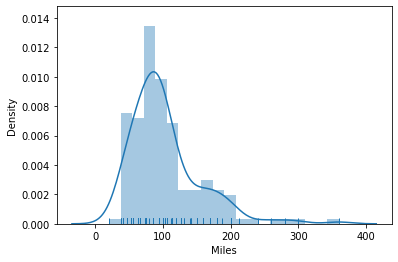

In [143]:
# ['Age','Education','Usage','Fitness','Income','Miles']:
sns.distplot( a=aerofit.Miles,rug=True)
# very less people able to run more than 200 miles , it can be a outliers 

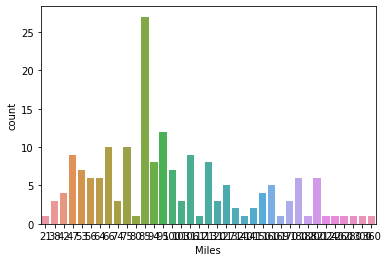

In [144]:
sns.countplot(x=aerofit.Miles)

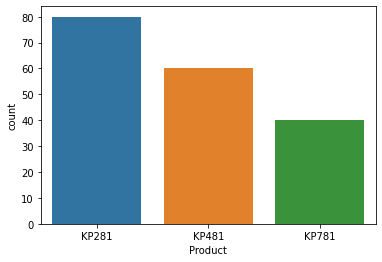

In [145]:
sns.countplot(data=aerofit,x=aerofit.Product)
# kp281 trademill was used by most of the customers

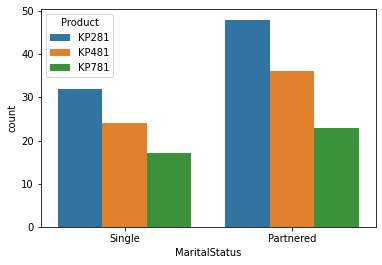

In [146]:
sns.countplot(data=aerofit,x=aerofit.MaritalStatus,hue='Product')

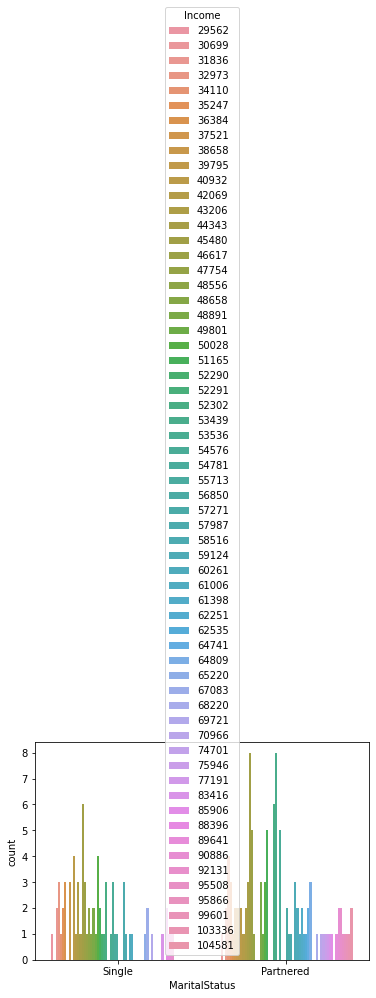

In [147]:
sns.countplot(data=aerofit,x=aerofit.MaritalStatus,hue='Income')

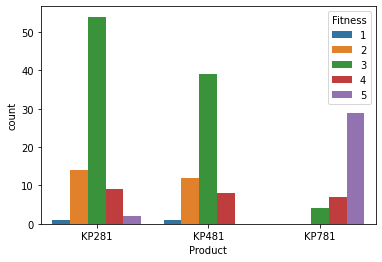

In [148]:
sns.countplot(data=aerofit,x=aerofit.Product,hue='Fitness')
# Most of the customers whose fitness was 5 they prefer to use kp781 machine

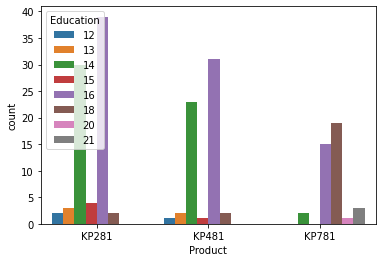

In [149]:
sns.countplot(data=aerofit,x=aerofit.Product,hue='Education')

In [150]:
for i in range(180):
   if aerofit['Age'][i]<30:
     aerofit["Age3"][i]="Young"
   elif aerofit['Age'][i]>=30 | aerofit['Age'][i]<=45:
     aerofit["Age3"][i]="MiddleAge"
   elif aerofit['Age'][i]>45:
     aerofit["Age3"][i]="Aged"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [151]:
aerofit["Age3"].value_counts()

Young        161
MiddleAge     13
Aged           6
Name: Age3, dtype: int64

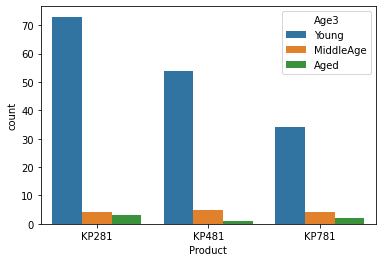

In [152]:
sns.countplot(data=aerofit,x=aerofit.Product,hue='Age3')
# Customers whose age less than 45 they prefer to use kp281 and kp481

In [153]:
aerofit.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age3', 'Experience'],
      dtype='object')

In [154]:
for i in range(180):
   if aerofit['Income'][i]<30000:
     aerofit["Experience"][i]="Fresher"
   elif aerofit['Income'][i]<=40000:
     aerofit["Experience"][i]="SE1"
   elif aerofit['Income'][i]<=50000:
      aerofit["Experience"][i]="SE2"
   elif aerofit['Income'][i]<=60000:
      aerofit["Experience"][i]="SE3"
   elif aerofit['Income'][i]>60000:
      aerofit["Experience"][i]="SE4"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [155]:
aerofit["Experience"].value_counts()

SE3        55
SE2        51
SE4        42
SE1        31
Fresher     1
Name: Experience, dtype: int64

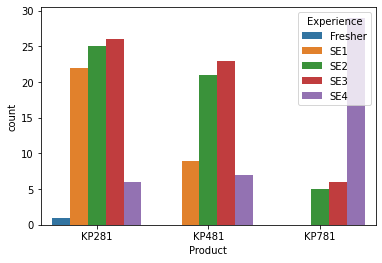

In [156]:
sns.countplot(data=aerofit,x=aerofit.Product,hue='Experience')

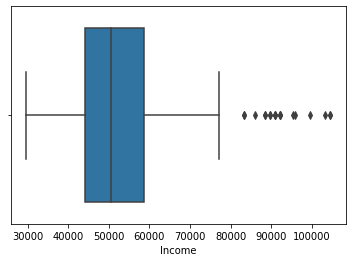

In [157]:
sns.boxplot(data=aerofit,x=aerofit.Income)

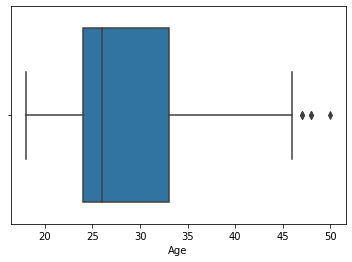

In [158]:
 #['Age','Education','Usage','Fitness','Income','Miles']:
 sns.boxplot(data=aerofit,x=aerofit.Age)

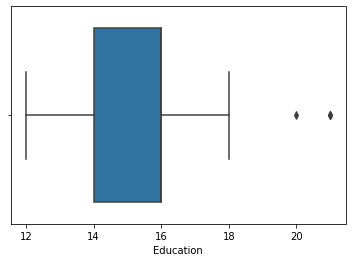

In [159]:
sns.boxplot(data=aerofit,x=aerofit.Education)

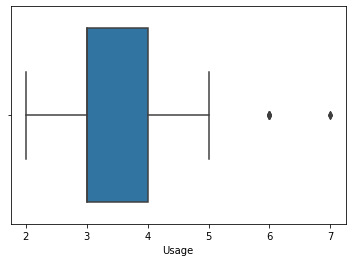

In [160]:
sns.boxplot(data=aerofit,x=aerofit.Usage)

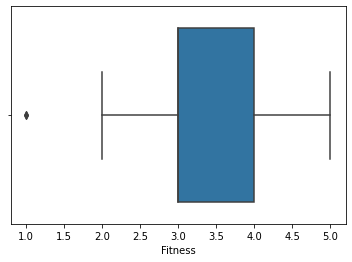

In [161]:
sns.boxplot(data=aerofit,x=aerofit.Fitness)

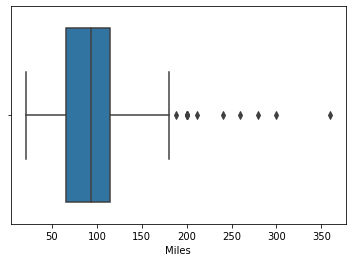

In [162]:
sns.boxplot(data=aerofit,x=aerofit.Miles)

There may be some outliers available in income , miles ,fiyness , usage,edsucation and age

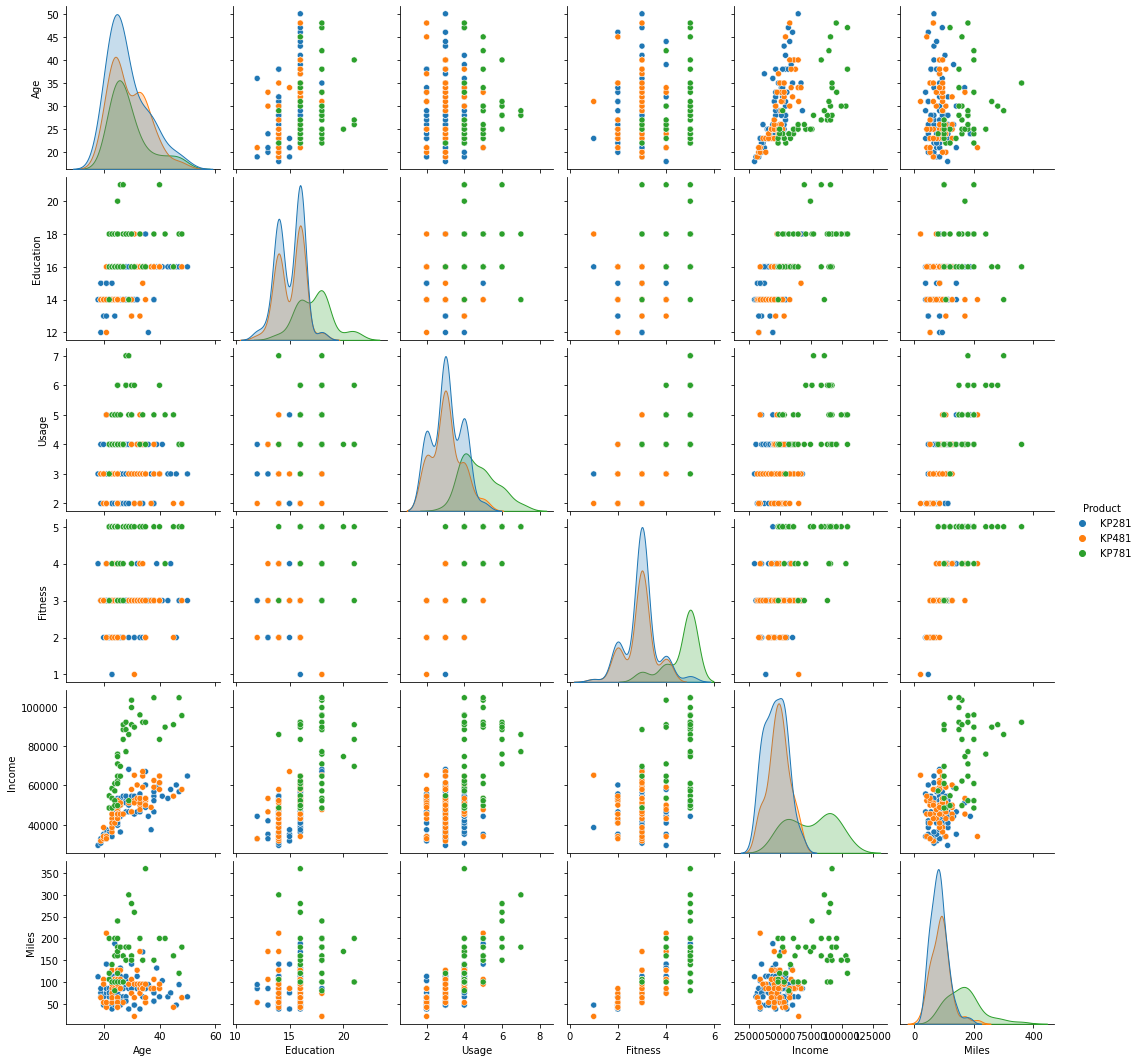

In [163]:
sns.pairplot(data=aerofit,hue="Product")

***4-->Missing Value & Outlier Detection***

In [164]:
aerofit.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [167]:
print(aerofit['Age'].mean())
print(aerofit['Age'].median())
#there is a possibility of outliers

28.788888888888888
26.0


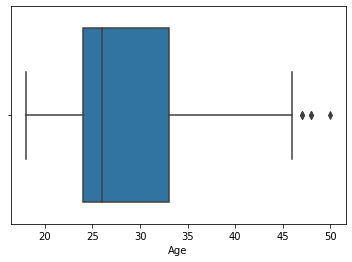

In [165]:
sns.boxplot(data=aerofit,x=aerofit.Age)

In [168]:
print(aerofit['Education'].mean())
print(aerofit['Education'].median())

15.572222222222223
16.0


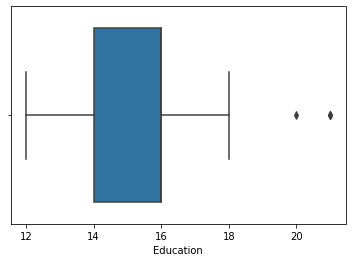

In [169]:
sns.boxplot(data=aerofit,x=aerofit.Education)

In [170]:
print(aerofit['Usage'].mean())
print(aerofit['Usage'].median())

3.4555555555555557
3.0


In [171]:
print(aerofit['Fitness'].mean())
print(aerofit['Fitness'].median())

3.311111111111111
3.0


In [172]:
print(aerofit['Income'].mean())
print(aerofit['Income'].median())

53719.57777777778
50596.5


In [173]:
print(aerofit['Miles'].mean())
print(aerofit['Miles'].median())

103.19444444444444
94.0


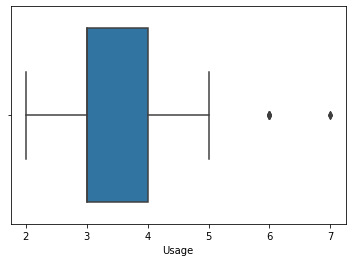

In [174]:
sns.boxplot(data=aerofit,x=aerofit.Usage)

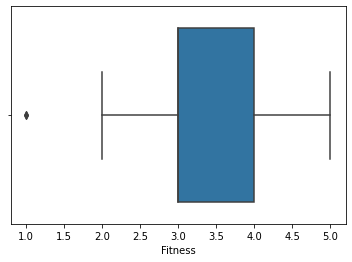

In [175]:
sns.boxplot(data=aerofit,x=aerofit.Fitness)

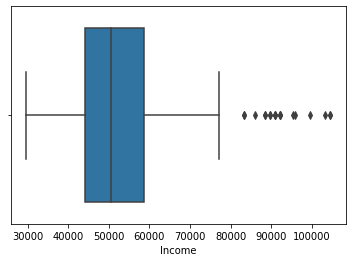

In [177]:
sns.boxplot(data=aerofit,x=aerofit.Income)

In [178]:
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Age3             0
Experience       0
dtype: int64

**5->Business Insights based on Non-Graphical and Visual Analysis**

In [180]:
pd.crosstab(index=aerofit.Product,columns=aerofit.MaritalStatus)

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [183]:
pd.crosstab(index=aerofit.Product,columns=aerofit.MaritalStatus,margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [184]:
pd.crosstab(index=aerofit.Product,columns=aerofit.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [185]:
pd.crosstab(index=aerofit.Product,columns=aerofit.Fitness,margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180
